In [1]:
import pandas as pd
import seaborn as sns
import re

In [145]:
import math

In [169]:
sales= pd.read_excel('D:\Downloads\Sales.xlsx')

In [170]:
sales.drop(sales.index[0],inplace=True)
sales.columns = sales.iloc[0]
sales.drop(sales.index[0],inplace=True)
sales.reset_index(inplace=True)
sales.head(3)

1,index,Timestamp,Select City,Meeting Date and Time,Lead Name,Lead Available,Meeting Re-schedule Date and Time,Lead Interested ...?,Source,Follow-Up Date and Time,...,Project Type,Project Load Capacity,Quotation Proposed,Quotation..?,Any Additional Commitment,Does Project Confirmed ?,Any follow-up required..?,Source,Reason for Denial,Please mention the highlights of the Meetings
0,2,2019/11/01 3:58:57 PM GMT+5:30,Jaipur,2019-11-01 13:40:00,Nirmal mehta ji,Yes,NaN,Yes,NaN,NaN,...,On-Grid,11,45,Excluding GST,NaN,NaN,NaN,NaN,NaN,Final meeting after subsidy confirm from rrecl
1,3,2019/11/05 4:34:02 PM GMT+5:30,Indore,2019-11-05 16:00:00,Rajesh Chauhan,Yes,NaN,"Yes, But Later",Peacock Solar Telemarketing,2019-11-11 11:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Need to Call and Check for the Meeting.
2,4,2019/11/06 11:35:50 AM GMT+5:30,Indore,2019-11-06 11:00:00,Ashok Vishwakarma,No,2019-11-12 10:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
sale0= sales[sales['Lead Interested ...?'].notna()]

In [13]:
sale0['Lead Interested ...?']= sale0['Lead Interested ...?'].replace('Yes, But Later', 'No')

D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()

In [15]:
sale0['Lead Interested ...?']= labelencoder.fit_transform(sale0['Lead Interested ...?'])
pd.pivot_table(sale0,index=['Select City'],values='Lead Interested ...?')

D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1,Lead Interested ...?
Select City,
Indore,0.085106
Jaipur,0.186047
Kota,1.000000


In [16]:
sale0.reset_index(drop=True,inplace=True)

In [53]:
for j in range(len(sale0['Lead Name'])):
    if re.search('Hospital|chool|estaurant|bhawan|heritage|company|home|ducation|hotel|Hotel|dental|hospital|group|sweets|Ambey|arketing|arden|esort|engineering|guest|home|tailors|motors|chaya|vilas|boys|event|Hall|hall|market|academy|ostel|matra|fruit',sale0['Lead Name'][j]):
        sale0.loc[j,'Lead Name']= 'Organization'

In [55]:
for i in range(len(sale0['Lead Name'])):
    if re.search('^(?!Organization).*',sale0['Lead Name'][i]):
        sale0.loc[i,'Lead Name']= 'Person'

In [57]:
pd.pivot_table(sale0,index=['Lead Name'],values='Lead Interested ...?')

1,Lead Interested ...?
Lead Name,
Organization,0.205882
Person,0.190476


In [21]:
sale= sales.copy()
import datetime
sale['Time']= sale['Meeting Date and Time'].dt.strftime("%H:%M:%S")

In [59]:
for i in range(len(sale['Time'])):
    if re.search('\A(10|11|12|13|14)',sale['Time'][i]):
        sale.loc[i,'Time']= 'Afternoon'

In [60]:
for i in range(len(sale['Time'])):
    if re.search('\A(15|16|17|18)',sale['Time'][i]):
        sale.loc[i,'Time']= 'Evening'

In [61]:
for i in range(len(sale['Time'])):
    if re.search('\A(19|20|21|22|23|00|01|02|03)',sale['Time'][i]):
        sale.loc[i,'Time']= 'Night'

In [62]:
for i in range(len(sale['Time'])):
    if re.search('\A(04|05|06|07|08|09)',sale['Time'][i]):
        sale.loc[i,'Time']= 'Early Morning'

In [63]:
sale['Lead Available']= labelencoder.fit_transform(sale['Lead Available'])

In [64]:
pd.pivot_table(sale,index=['Time'],values='Lead Available')

1,Lead Available
Time,
Afternoon,0.754098
Early Morning,0.894737
Evening,0.791667
Night,0.937500


In [65]:
sale2= sales[sales['Lead Occupation'].notna()]

In [67]:
import numpy as np

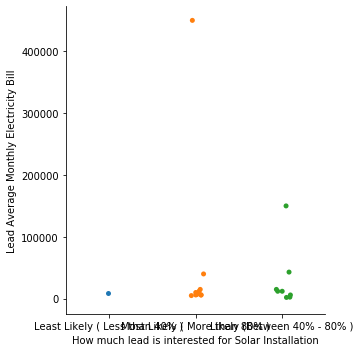

In [94]:
sns.catplot(x='How much lead is interested for Solar Installation',y='Lead Average Monthly Electricity Bill',kind='strip',data=sale2)

In [90]:
sale2['Lead Average Monthly Electricity Bill']= sale2['Lead Average Monthly Electricity Bill'].astype(int)

D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
sale2['Lead Average Monthly Electricity Bill'].dtype

dtype('int32')

In [93]:
pd.pivot_table(sale2,index=['How much lead is interested for Solar Installation'],values='Lead Average Monthly Electricity Bill',aggfunc= np.median)

1,Lead Average Monthly Electricity Bill
How much lead is interested for Solar Installation,
Least Likely ( Less than 40% ),9000
Likely (Between 40% - 80% ),12000
Most Likely ( More than 80% ),8500


In [202]:
sale2['How much lead is interested for Solar Installation']= sale2['How much lead is interested for Solar Installation'].replace('Least Likely ( Less than 40% )','Least Likely')
sale2['How much lead is interested for Solar Installation']= sale2['How much lead is interested for Solar Installation'].replace('Likely (Between 40% - 80% )','Likely')
sale2['How much lead is interested for Solar Installation']= sale2['How much lead is interested for Solar Installation'].replace('Most Likely ( More than 80% )','Most Likely')

D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

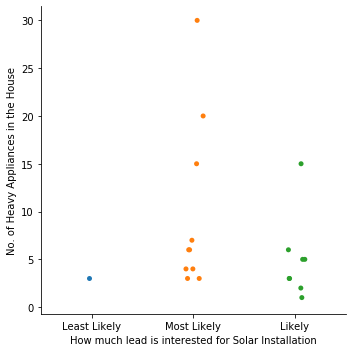

In [203]:
sns.catplot(x='How much lead is interested for Solar Installation',y='No. of Heavy Appliances in the House',kind='strip',data=sale2)

In [96]:
sale2['No. of Heavy Appliances in the House']= sale2['No. of Heavy Appliances in the House'].astype(int)

D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
pd.pivot_table(sale2,index=['How much lead is interested for Solar Installation'],values='No. of Heavy Appliances in the House',aggfunc= [np.median,np.mean])

,median,mean
1,No. of Heavy Appliances in the House,No. of Heavy Appliances in the House
How much lead is interested for Solar Installation,,
Least Likely ( Less than 40% ),3,3.0
Likely (Between 40% - 80% ),4,5.0
Most Likely ( More than 80% ),6,9.8


In [98]:
pd.crosstab(sale2['Lead Occupation'],sale2['How much lead is interested for Solar Installation'],margins=True)

How much lead is interested for Solar Installation,Least Likely ( Less than 40% ),Likely (Between 40% - 80% ),Most Likely ( More than 80% ),All
Lead Occupation,,,,
Bank manger retiered,1,0,0,1
Businessmen,0,3,6,9
Government Employee,0,3,2,5
Hostel owner,0,0,1,1
Private Job,0,2,0,2
Shopkeeper,0,0,1,1
All,1,8,10,19


In [99]:
sale2['Lead having Power Backup..?']= labelencoder.fit_transform(sale2['Lead having Power Backup..?'])

D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
pd.pivot_table(sale2,index=['How much lead is interested for Solar Installation'],values='Lead having Power Backup..?',aggfunc= [np.median,np.mean])

,median,mean
1,Lead having Power Backup..?,Lead having Power Backup..?
How much lead is interested for Solar Installation,,
Least Likely ( Less than 40% ),0.0,0.0
Likely (Between 40% - 80% ),0.5,0.5
Most Likely ( More than 80% ),0.5,0.5


In [110]:
pd.crosstab(sale2['Source2'],sale2['How much lead is interested for Solar Installation'],margins=True)

How much lead is interested for Solar Installation,Least Likely ( Less than 40% ),Likely (Between 40% - 80% ),Most Likely ( More than 80% ),All
Source2,,,,
Field,0,2,0,2
Homver city,0,0,1,1
Local,1,0,0,1
Peacock Solar Customer Reference,0,0,1,1
Peacock Solar Employee Reference,0,2,4,6
Peacock Solar Telemarketing,0,4,3,7
Social Media,0,0,1,1
All,1,8,10,19


In [109]:
column_names= sale2.columns.values
column_names[16]= 'Source2'
sale2.columns= column_names

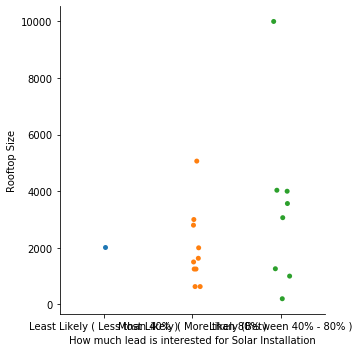

In [111]:
sns.catplot(x='How much lead is interested for Solar Installation',y='Rooftop Size',kind='strip',data=sale2)

In [112]:
sale2['Rooftop Size']= sale2['Rooftop Size'].astype(int)
pd.pivot_table(sale2,index=['How much lead is interested for Solar Installation'],values='Rooftop Size',aggfunc= [np.median,np.mean])

D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,median,mean
,Rooftop Size,Rooftop Size
How much lead is interested for Solar Installation,,
Least Likely ( Less than 40% ),2030,2030.000
Likely (Between 40% - 80% ),3315,3390.625
Most Likely ( More than 80% ),1565,1975.500


In [113]:
pd.crosstab(sale2['Stories in the House'],sale2['How much lead is interested for Solar Installation'],margins=True)

How much lead is interested for Solar Installation,Least Likely ( Less than 40% ),Likely (Between 40% - 80% ),Most Likely ( More than 80% ),All
Stories in the House,,,,
Ground Floor,0,1,1,2
Ground Floor + 1,0,1,1,2
Ground Floor + 2,1,1,3,5
Ground Floor + 3,0,4,4,8
Ground Floor + 4,0,1,1,2
All,1,8,10,19


In [114]:
pd.crosstab(sale2['Quotation..?'],sale2['How much lead is interested for Solar Installation'],margins=True)

How much lead is interested for Solar Installation,Least Likely ( Less than 40% ),Likely (Between 40% - 80% ),Most Likely ( More than 80% ),All
Quotation..?,,,,
Excluding GST,1,4,3,8
Including GST,0,4,7,11
All,1,8,10,19


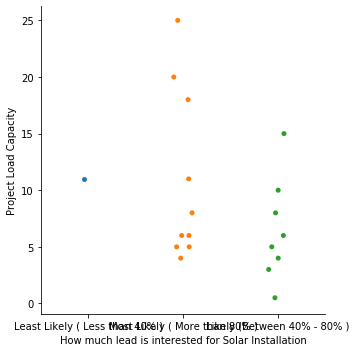

In [115]:
sns.catplot(x='How much lead is interested for Solar Installation',y='Project Load Capacity',kind='strip',data=sale2)

In [116]:
sale2['Project Load Capacity']= sale2['Project Load Capacity'].astype(int)
pd.pivot_table(sale2,index=['How much lead is interested for Solar Installation'],values='Project Load Capacity',aggfunc= [np.median,np.mean])

D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,median,mean
,Project Load Capacity,Project Load Capacity
How much lead is interested for Solar Installation,,
Least Likely ( Less than 40% ),11.0,11.000
Likely (Between 40% - 80% ),5.5,6.375
Most Likely ( More than 80% ),7.0,10.800


In [119]:
sale2.reset_index(inplace=True)

In [120]:
for i in range(len(sale2['Quotation Proposed'])):
    if sale2['Quotation Proposed'][i] < 100:
        sale2.loc[i,'Quotation Proposed']= sale2['Quotation Proposed'][i]*10000
        

In [122]:
sale2.head(3)

,level_0,index,Timestamp,Select City,Meeting Date and Time,Lead Name,Lead Available,Meeting Re-schedule Date and Time,Lead Interested ...?,Source,...,Project Type,Project Load Capacity,Quotation Proposed,Quotation..?,Any Additional Commitment,Does Project Confirmed ?,Any follow-up required..?,Source,Reason for Denial,Please mention the highlights of the Meetings
0,0,2,2019/11/01 3:58:57 PM GMT+5:30,Jaipur,2019-11-01 13:40:00,Nirmal mehta ji,Yes,NaN,Yes,NaN,...,On-Grid,11,450000,Excluding GST,NaN,NaN,NaN,NaN,NaN,Final meeting after subsidy confirm from rrecl
1,6,8,2019/11/13 8:40:19 PM GMT+5:30,Indore,2019-11-13 02:00:00,Gaurav baundi,Yes,2019-11-15 00:00:00,Yes,NaN,...,On-Grid,11,110000,Excluding GST,NaN,No,NaN,NaN,NaN,Need to approach after 2 days
2,7,9,2019/11/08 1:59:43 PM GMT+5:30,Jaipur,2019-11-06 19:08:00,Gitanjli hotel ramesh chand sharma,Yes,NaN,Yes,NaN,...,On-Grid,4,400000,Excluding GST,NaN,NaN,NaN,NaN,NaN,Solar very costly bu effective after some they...


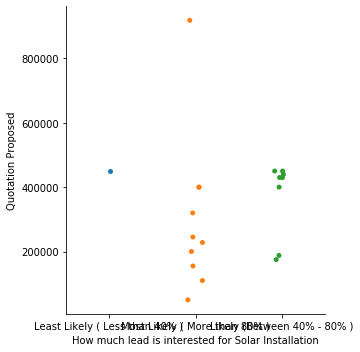

In [123]:
sns.catplot(x='How much lead is interested for Solar Installation',y='Quotation Proposed',kind='strip',data=sale2)

In [124]:
sale2['Quotation Proposed']= sale2['Quotation Proposed'].astype(int)
pd.pivot_table(sale2,index=['How much lead is interested for Solar Installation'],values='Quotation Proposed',aggfunc= [np.median,np.mean])

D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,median,mean
,Quotation Proposed,Quotation Proposed
How much lead is interested for Solar Installation,,
Least Likely ( Less than 40% ),450000,450000
Likely (Between 40% - 80% ),430000,370375
Most Likely ( More than 80% ),236500,302600


In [125]:
# 6+, 15-30, 400000-, 8+

In [138]:
sale1= sales.copy()

In [190]:
for i in range(len(sale1['Source2'])):
    if sale1['Source2'][i]=='nan':
        sale1.loc[i,'Source2']= sale1['Source'][i]

In [192]:
for i in range(len(sale1['Source2'])):
    if sale1['Source2'][i]=='nan':
        sale1.loc[i,'Source2']= sale1['Source3'][i]

In [176]:
colnames= sale1.columns.values
colnames[27]= 'Source3'
sale1.columns= colnames

In [195]:
sale11= sale1[sale1['Source2']!='nan']

In [196]:
sale11['Source2']

0                                Local 
1           Peacock Solar Telemarketing
4           Peacock Solar Telemarketing
5           Peacock Solar Telemarketing
6           Peacock Solar Telemarketing
                     ...               
112                        Self Calling
113         Peacock Solar Telemarketing
114                        Self calling
117    Peacock Solar Employee Reference
118    Peacock Solar Employee Reference
Name: Source2, Length: 96, dtype: object

In [198]:
sale11['Lead Interested ...?']= sale11['Lead Interested ...?'].replace('Yes, But Later', 'No')

D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [199]:
sale11['Lead Interested ...?']= labelencoder.fit_transform(sale11['Lead Interested ...?'])
pd.pivot_table(sale11,index=['Source2'],values='Lead Interested ...?')

D:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Lead Interested ...?
Source2,
2field,0.000000
Field,0.076923
Homver city,1.000000
Local,1.000000
Peacock Solar Customer Reference,1.000000
Peacock Solar Employee Reference,0.142857
Peacock Solar Telemarketing,0.388889
Reference by client,0.000000
Self Calling,0.000000


In [200]:
sale12= sale1[sale1['Source2']!='nan']
sale12['Lead Interested ...?']= sale12['Lead Interested ...?'].replace('Yes, But Later', 'No')

D:\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [201]:
pd.crosstab(sale12['Source2'],sale12['Lead Interested ...?'],margins=True)

Lead Interested ...?,No,Yes,All
Source2,,,
2field,1,0,1
Field,24,2,26
Homver city,0,1,1
Local,0,1,1
Peacock Solar Customer Reference,0,1,1
Peacock Solar Employee Reference,36,6,42
Peacock Solar Telemarketing,11,7,18
Reference by client,1,0,1
Self Calling,1,0,1
